In [2]:
from numbers import Number
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import onix.models.hyperfine as hyperfine
from IPython.display import display

%matplotlib ipympl

In [53]:
B_field = 200e-4
print(f"B field is set to {B_field / 1e-4:.1f} G")

ground = hyperfine.states["7F0"]
ground._Hamiltonian = ground.H_total(B_field)
excited = hyperfine.states["5D0"]
excited._Hamiltonian = excited.H_total(B_field)

B field is set to 200.0 G


## Zeeman splittings

[2.27551586e-01 1.18957134e+02 1.26299105e-01 8.99153638e+01
 3.42176575e-02]


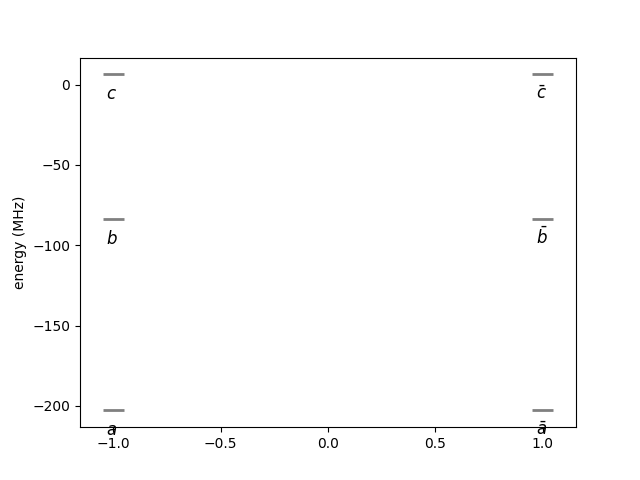

In [54]:
energies_g, states_g = ground.energies_and_eigenstates()
print(np.diff(energies_g))
fig, ax = plt.subplots()
ax.set_ylabel("energy (MHz)")

for kk, label in enumerate(hyperfine.state_labels["7F0"]):
    if "'" in label:
        xval = 1
    else:
        xval = -1
    ax.errorbar(
        xval, energies_g[kk],
        color="gray", fmt='.', markersize=0,
        xerr=0.05, capsize=0, elinewidth=2,
    )
    if "'" in label:
        state_text = "$\\bar{" + label[0] + "}$"
    else:
        state_text = f"${label[0]}$"
    ax.annotate(
        state_text,
        xy=(xval, energies_g[kk]), xycoords="data", xytext=(-5, -18),
        textcoords="offset points", color="k", size=12,
    )
    

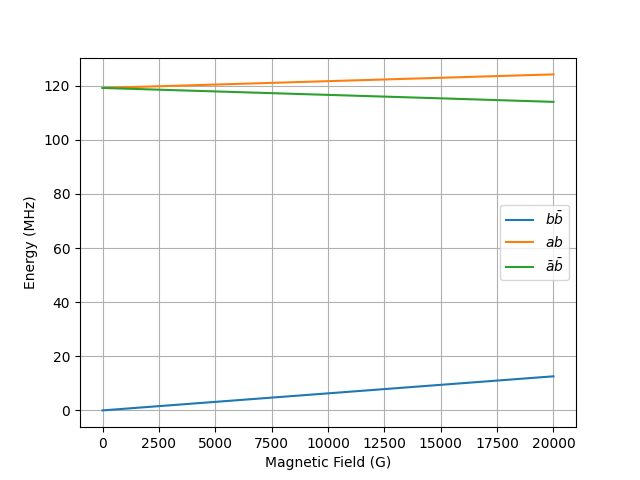

In [49]:
B_field_min = 0 #G
B_field_max = 20000 #G


B_axis = np.linspace(B_field_min * 1e-4, B_field_max * 1e-4, int(1e4))
B_axis_gauss = B_axis * 1e4
b_bbar = []
a_b = []
abar_bbar = []
for i in B_axis:
    ground = hyperfine.states["7F0"]
    ground._Hamiltonian = ground.H_total(i)
    energies_g, states_g = ground.energies_and_eigenstates()
    ## relevant energies are b-bbar and either a, b or abar, bbar (the vertical transitions are much stronger than cross transitions)
    a = energies_g[0]
    abar = energies_g[1]
    b = energies_g[2]
    bbar = energies_g[3]
    b_bbar.append(bbar - b)
    a_b.append(b-a)
    abar_bbar.append(bbar - abar)
fig, ax = plt.subplots()
ax.plot(B_axis_gauss, b_bbar, label = r"$b\bar{b}$")
ax.plot(B_axis_gauss, a_b, label = r"$ab$")
ax.plot(B_axis_gauss, abar_bbar, label = r"$\bar{a}\bar{b}$")
ax.grid()
plt.legend()
ax.set_xlabel("Magnetic Field (G)")
ax.set_ylabel("Energy (MHz)");

In [56]:
from onix.data_tools import get_experiment_data

In [58]:
data, headers = get_experiment_data(218694)
headers["params"]["rf"]

{'pump_amplitude': 1500,
 'probe_amplitude': 800,
 'pump_detunings': array([-100,  -80,  -60,  -40]) <Unit('kilohertz')>,
 'probe_detuning': -1.0 <Unit('kilohertz')>,
 'pump_time': 0.22 <Unit('millisecond')>,
 'probe_time': 0.45 <Unit('millisecond')>,
 'delay_time': 0.1 <Unit('millisecond')>,
 'probe_phase': 0,
 'name': 'rf_coil',
 'transition': 'ab',
 'offset': 30 <Unit('kilohertz')>}